In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit , GridSearchCV

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

#imblearn
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier

In [3]:
#importing dataset
train_df = pd.read_csv('../Datasets/Loan Prediction/train_u6lujuX_CVtuZ9i.csv')

In [4]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_df.info()

#There exists a couple of missing values in the datasets which needs to be handled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# The number of missing values in the dataset
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#Percentage of missing values in each feature
train_df.isna().mean()

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

As we can see, imputations for the missing values will have mild consequences as the highest percentage of missing values in any of the features is just 8%

In [8]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
#Looking at the unique values count for each of the features

for col in train_df.columns:
    print(col)
    print('-'*50)
    print(train_df[col].value_counts())
    print('-'*50)

Loan_ID
--------------------------------------------------
LP002794    1
LP002983    1
LP001448    1
LP001770    1
LP002024    1
           ..
LP001086    1
LP002785    1
LP002772    1
LP001665    1
LP002087    1
Name: Loan_ID, Length: 614, dtype: int64
--------------------------------------------------
Gender
--------------------------------------------------
Male      489
Female    112
Name: Gender, dtype: int64
--------------------------------------------------
Married
--------------------------------------------------
Yes    398
No     213
Name: Married, dtype: int64
--------------------------------------------------
Dependents
--------------------------------------------------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
--------------------------------------------------
Education
--------------------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
--------------------------------------------------
Self_

In [12]:
#dropping the Loan_ID columns as its insignificant to the generalization of models(contains no pattern)

train_df.drop('Loan_ID', axis=1 , inplace=True)

In [13]:
#Since credit history is of binary value of 0 and 1, we convert it into an object dtype

train_df['Credit_History'] = train_df['Credit_History'].astype('O')
train_df['Credit_History'].dtype

dtype('O')

In [14]:
#Seperating the numerical columns and the categorical columns

cat_cols = []
num_cols = []

for col , content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        num_cols.append(col)
    else:
        cat_cols.append(col)

In [15]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [16]:
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [17]:
cat_data = train_df.loc[: , cat_cols]
num_data = train_df.loc[: , num_cols]

In [18]:
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [19]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [20]:
train_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


### Filling in Missing Values

In [21]:
cat_data.isna().sum()

Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Credit_History    50
Property_Area      0
Loan_Status        0
dtype: int64

In [22]:
#For the Gender and the Dependents features since the number of missing values is quite small, we use mode replacement
for col in ['Gender' , 'Dependents' , 'Married']:
    cat_data[col].fillna(cat_data[col].mode()[0], inplace=True)
    
cat_data.loc[: , ['Gender' , 'Dependents' , 'Married']].isna().sum()

Gender        0
Dependents    0
Married       0
dtype: int64

In [23]:
# For self employed and credit history , random_imputations will be done on the missing features

for col in ['Self_Employed' , 'Credit_History']:
    random_samples = cat_data[col].dropna().sample(cat_data[col].isna().sum(), random_state=42)
    random_samples.index = cat_data[cat_data[col].isna()].index
    
    cat_data.loc[cat_data[col].isna() , col] = random_samples

In [24]:
cat_data.isna().sum()

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
dtype: int64

In [25]:
num_data.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
dtype: int64

In [26]:
imputer = KNNImputer();
num_data = pd.DataFrame(imputer.fit_transform(num_data) , columns=num_data.columns)

In [27]:
num_data.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

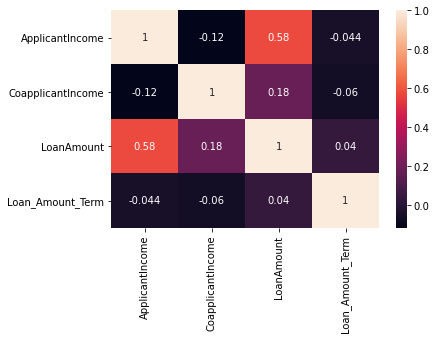

In [28]:
## Lets take a look at the correlations in the numerical data again
sns.heatmap(num_data.corr() , annot=True);

In [29]:
for col in cat_data.columns:
    print(cat_data[col].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64
Yes    401
No     213
Name: Married, dtype: int64
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     529
Yes     85
Name: Self_Employed, dtype: int64
1.0    515
0.0     99
Name: Credit_History, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


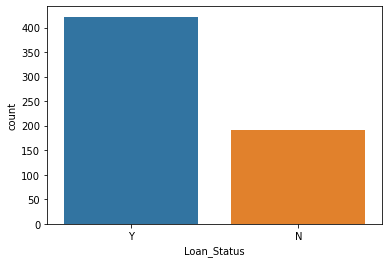

In [30]:
# Lets look at the balancing the target colummn

sns.countplot(cat_data['Loan_Status']);

## The distribution of the datasetclasses is a bit imbalanced so we gonna oversample the minority class to slightly over 50%


In [31]:
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status' , axis=1 , inplace=True)

In [32]:
for col in cat_data.columns:
    lenc = LabelEncoder().fit(cat_data[col])
    cat_data[col] = lenc.transform(cat_data[col])

In [33]:
##Performing oversampling on the minority class to fix slight target imbalancing

sampler = SMOTE(random_state=42 , sampling_strategy=.8)

data = pd.concat([cat_data , num_data] , axis=1)

X_res , y_res = sampler.fit_resample(data , target)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

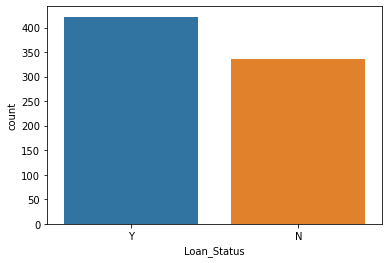

In [34]:
sns.countplot(y_res)

In [35]:
ensemble_models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}



class_models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'XGBoost': XGBClassifier()
}

In [36]:

def model_evals(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))


def train_eval_score(models , X_train , y_train , X_test=None , y_test=None, eval_on_test=False):
    for name , model in models.items():
        print('Model Name:'+ name)
        model.fit(X_train , y_train)
        if eval_on_test:
            model_evals(y_test , model.predict(X_test))
        else:
            model_evals(y_train , model.predict(X_train))
        print('-'*50)

In [37]:
y_res = y_res.map({'Y':1 , 'N':0})

In [38]:
train_eval_score(ensemble_models , X_res , y_res)

Model Name:DecisionTreeClassifier
  pre: 1.000
  rec: 1.000
  f1: 1.000
  loss: 0.000
  acc: 1.000
--------------------------------------------------
Model Name:RandomForestClassifier
  pre: 1.000
  rec: 1.000
  f1: 1.000
  loss: 0.000
  acc: 1.000
--------------------------------------------------
Model Name:GradientBoostingClassifier
  pre: 0.841
  rec: 0.981
  f1: 0.906
  loss: 3.914
  acc: 0.887
--------------------------------------------------


##The ensemble methods are very good at generalizing and it appears that the decision tree classifier and the randomforest classifiers have been overfitting the dataset

In [39]:
train_eval_score(class_models , X_res , y_res)

Model Name:LogisticRegression
  pre: 0.750
  rec: 0.941
  f1: 0.835
  loss: 7.145
  acc: 0.793
--------------------------------------------------
Model Name:KNeighborsClassifier
  pre: 0.791
  rec: 0.791
  f1: 0.791
  loss: 8.009
  acc: 0.768
--------------------------------------------------
Model Name:SVC
  pre: 0.560
  rec: 0.986
  f1: 0.714
  loss: 15.154
  acc: 0.561
--------------------------------------------------
Model Name:XGBoost
[12:01:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  pre: 1.000
  rec: 1.000
  f1: 1.000
  loss: 0.000
  acc: 1.000
--------------------------------------------------


The logistic regression model seemes to do fairly well on the dataset than the Nearest Neighbors classifier and SVC model.

Going further in to do some more feature engineering on the dataset 

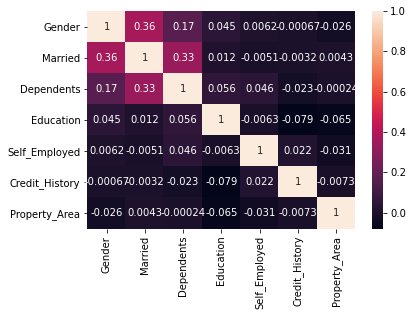

In [40]:
sns.heatmap(cat_data.corr() , annot=True);

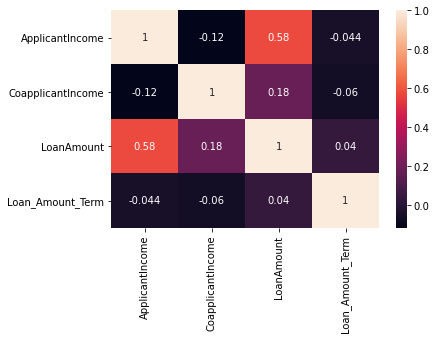

In [41]:
sns.heatmap(num_data.corr() , annot=True);

In [42]:
num_data = X_res.loc[: , num_cols]
cat_data = X_res.loc[: , cat_cols[:-1]]

In [43]:
#Lets create some more features, connecting the highly correlated features 

num_data['Loan_Amount/Term'] = num_data['LoanAmount'] * num_data['Loan_Amount_Term']
num_data['Applicant/Co_Income'] = num_data['CoapplicantIncome'] / num_data['ApplicantIncome']


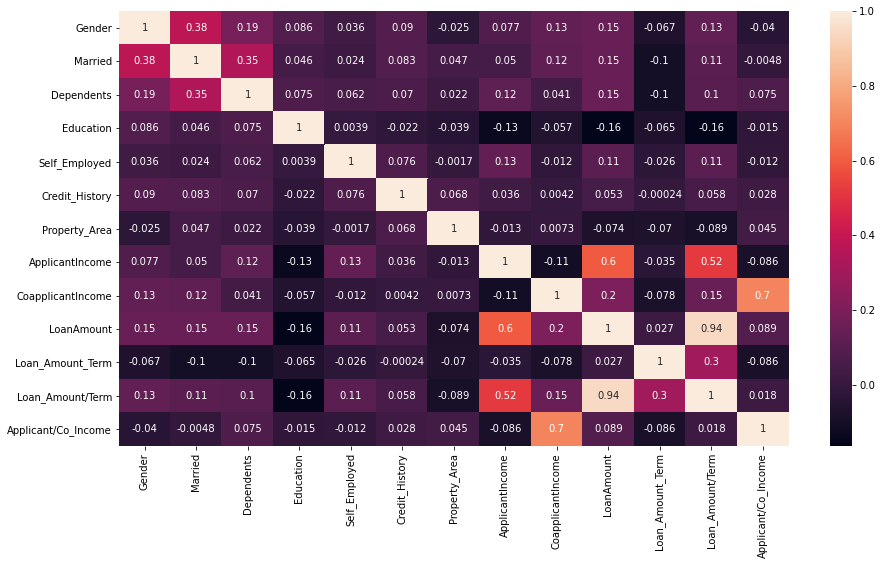

In [44]:
plt.figure(figsize=(15,8))
data = pd.concat([cat_data , num_data] , axis=1)
sns.heatmap(data.corr() , annot=True);

In [45]:
train_eval_score(ensemble_models , data , y_res)

Model Name:DecisionTreeClassifier
  pre: 1.000
  rec: 1.000
  f1: 1.000
  loss: 0.000
  acc: 1.000
--------------------------------------------------
Model Name:RandomForestClassifier
  pre: 1.000
  rec: 1.000
  f1: 1.000
  loss: 0.000
  acc: 1.000
--------------------------------------------------
Model Name:GradientBoostingClassifier
  pre: 0.855
  rec: 0.976
  f1: 0.912
  loss: 3.641
  acc: 0.895
--------------------------------------------------


In [46]:
train_eval_score(class_models , data , y_res)

Model Name:LogisticRegression
  pre: 0.732
  rec: 0.810
  f1: 0.769
  loss: 9.329
  acc: 0.730
--------------------------------------------------
Model Name:KNeighborsClassifier
  pre: 0.723
  rec: 0.784
  f1: 0.752
  loss: 9.920
  acc: 0.713
--------------------------------------------------
Model Name:SVC
  pre: 0.559
  rec: 0.993
  f1: 0.715
  loss: 15.199
  acc: 0.560
--------------------------------------------------
Model Name:XGBoost
[12:01:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  pre: 1.000
  rec: 1.000
  f1: 1.000
  loss: 0.000
  acc: 1.000
--------------------------------------------------


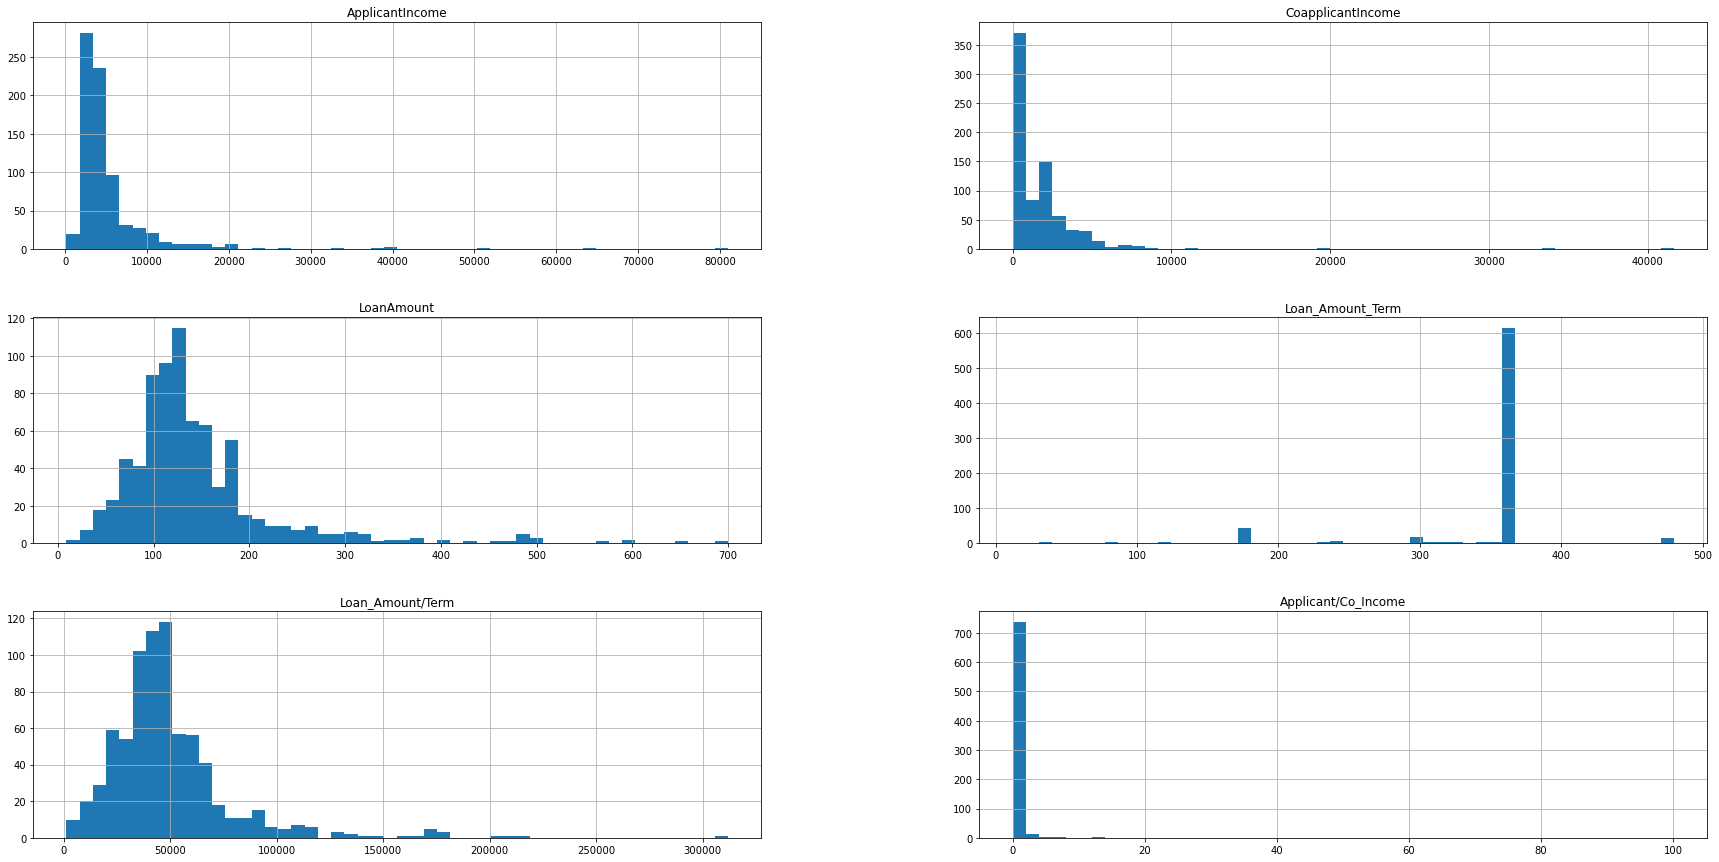

In [47]:
num_data.hist(figsize=(30,15) ,bins=50);

In [48]:
## Applying log transformation on the numerical columns to handle skewness of distributions
for col in num_data.columns:
    num_data[col] = np.log(num_data[col] + 1)

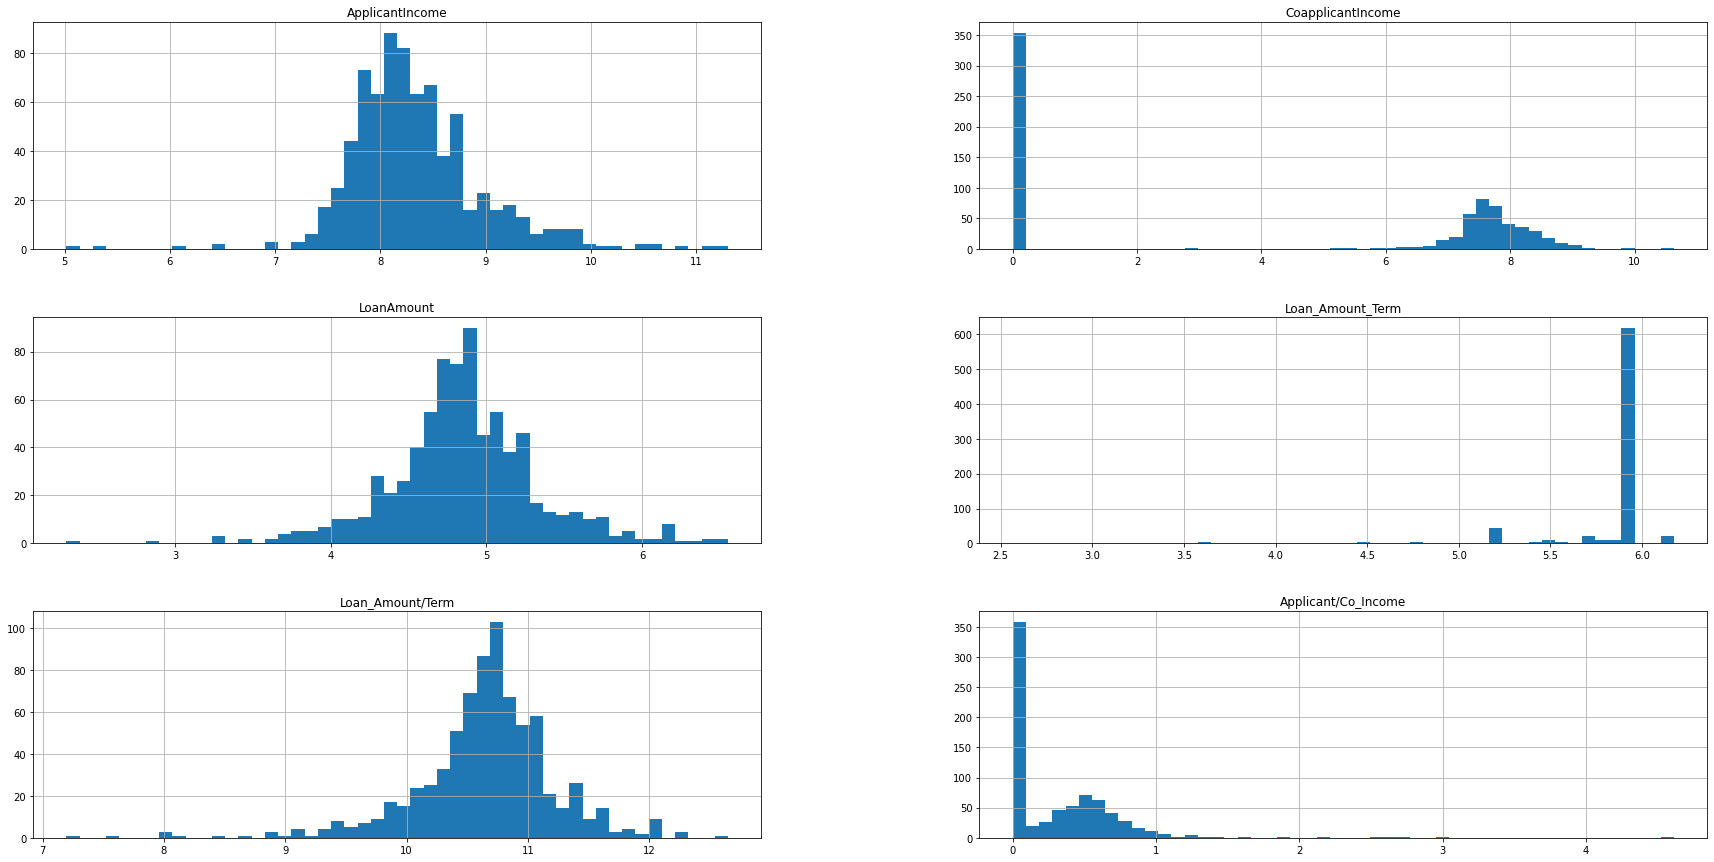

In [49]:
num_data.hist(figsize=(30,15) ,bins=50);

In [50]:
## Splitting into training and test sets

sss = StratifiedShuffleSplit(n_splits=10 , test_size=.2 , random_state=10)
data = pd.concat([cat_data , num_data] , axis=1)

for train , test in sss.split(data , y_res):
    X_train , X_test = data.iloc[train] , data.iloc[test]
    y_train , y_test = y_res.iloc[train], y_res.iloc[test]

In [51]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(607, 152, 607, 152)

In [52]:
train_eval_score(ensemble_models , X_train , y_train , X_test , y_test, eval_on_test=True)

Model Name:DecisionTreeClassifier
  pre: 0.758
  rec: 0.812
  f1: 0.784
  loss: 8.635
  acc: 0.750
--------------------------------------------------
Model Name:RandomForestClassifier
  pre: 0.800
  rec: 0.941
  f1: 0.865
  loss: 5.681
  acc: 0.836
--------------------------------------------------
Model Name:GradientBoostingClassifier
  pre: 0.769
  rec: 0.941
  f1: 0.847
  loss: 6.590
  acc: 0.809
--------------------------------------------------


In [53]:
train_eval_score(class_models , X_train , y_train, X_test , y_test, eval_on_test=True)

Model Name:LogisticRegression
  pre: 0.761
  rec: 0.976
  f1: 0.856
  loss: 6.363
  acc: 0.816
--------------------------------------------------
Model Name:KNeighborsClassifier
  pre: 0.780
  rec: 0.918
  f1: 0.843
  loss: 6.590
  acc: 0.809
--------------------------------------------------
Model Name:SVC
  pre: 0.746
  rec: 1.000
  f1: 0.854
  loss: 6.590
  acc: 0.809
--------------------------------------------------
Model Name:XGBoost
[12:02:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  pre: 0.800
  rec: 0.894
  f1: 0.844
  loss: 6.363
  acc: 0.816
--------------------------------------------------


From the above results, after running several iterations of values for the random state which is not a good practice , the RandomForestClassifier seems to perform better 

## Tunning the RandomForestClassifier Model

In [54]:
## Hyperparameter tunning using GridSearchCV

params = {
    'n_estimators' :  [10,12,13,14],
    'max_depth' : np.arange(20 , 70 , 10),
    'min_samples_split' : [8,9,10,11,12],
    'min_samples_leaf': [2,3,4,5],
}

gs_rf_model = GridSearchCV(RandomForestClassifier(random_state=42) , param_grid = params , scoring='accuracy' , cv=5 , n_jobs=-1 )

In [55]:
gs_rf_model.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([20, 30, 40, 50, 60]),
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [8, 9, 10, 11, 12],
                         'n_estimators': [10, 12, 13, 14]},
             scoring='accuracy')

In [56]:
gs_rf_model.score(X_test , y_test)

0.8289473684210527

In [57]:
gs_rf_model.best_params_

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 9,
 'n_estimators': 13}

## Tunning the Logistic Regression model

In [58]:
param_grid_lr=[
    {
        'C': [0.001,0.01,0.1,1,10,100,1000],
        'max_iter':np.arange(1,20,2),
        'penalty':['l1','l2'],
        'solver':['liblinear' , 'lbfgs']
    },
    {
        'C': [0.001,0.01,0.1,1,10,100,1000],
        'max_iter':np.arange(10,100,10),
        'penalty':['elasticnet'],
        'solver':['saga'],
        'l1_ratio': [1]
    }
]
gs_lr_model = GridSearchCV(LogisticRegression() , param_grid = param_grid_lr , scoring='accuracy' , cv=5 )

In [59]:
gs_lr_model.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'max_iter': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'lbfgs']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'l1_ratio': [1],
                          'max_iter': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy')

In [60]:
gs_lr_model.score(X_test , y_test)

0.8092105263157895

In [61]:
gs_lr_model.best_params_

{'C': 1000, 'max_iter': 3, 'penalty': 'l1', 'solver': 'liblinear'}

## Tunning the XGBOOST model

In [62]:
params={
    "learning_rate"    : [0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    'n_estimators':np.arange(10 , 100 , 10),
    'max_depth': [50,100,150],
    'gamma': np.arange(10,50,10),
    'min_child_weight':[10,20,25],
}

xgb_model = XGBClassifier()

gs_xgb_model = GridSearchCV(xgb_model , param_grid=params , cv=5 , verbose=True , n_jobs=-1)

In [63]:
gs_xgb_model.fit(X_train , y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
[12:12:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [64]:
print(f"Accuracy of the xgboost classifier on the training set is {gs_xgb_model.score(X_train ,y_train)}")
print(f"Accuracy of the xgboost classifier on the test set is {gs_xgb_model.score(X_test ,y_test):.2f}")

Accuracy of the xgboost classifier on the training set is 0.7759472817133443
Accuracy of the xgboost classifier on the test set is 0.81


## Tunning the KNeighbors Classifier

In [65]:
params = {
    'n_neighbors': np.arange(30 , 40 , 1),
    'p':np.arange(1 , 5 , 1),
}

knn_model = KNeighborsClassifier()

gs_knn_model = GridSearchCV(knn_model , param_grid=params , cv=5 , verbose=True , n_jobs=-1)

In [66]:
gs_knn_model.fit(X_train , y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39]),
                         'p': array([1, 2, 3, 4])},
             verbose=True)

In [67]:
gs_knn_model.score(X_test , y_test)

0.8026315789473685

In [68]:
gs_knn_model.best_params_

{'n_neighbors': 30, 'p': 1}